In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from math import sqrt
from math import inf
from math import log
from statistics import median, mean
from sklearn.model_selection import KFold

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("sample_final.csv")

In [3]:
dc = round(df.corr(), 2)
##dc.drop([0:36])
dc.drop(dc.columns[0:35], axis = 1, inplace = True)
dc

,building_size,rank,rankOf,rankStars,rankStatewidePercentage,averageStandardScore,has_elementary,has_middle,has_high,ocean_related,environment_related,building_related,community_related,positive_comments,more_rural,more_urban,other
zipcode,-0.06,0.08,-0.02,-0.10,-0.10,-0.09,0.00,0.03,0.06,-0.04,0.22,-0.15,0.20,0.14,0.09,0.08,0.16
price,0.43,-0.36,-0.17,0.10,0.11,0.12,-0.18,-0.17,-0.19,0.16,-0.21,-0.02,-0.21,-0.12,-0.12,-0.06,-0.27
population,0.03,-0.02,0.01,0.02,0.02,0.02,-0.03,-0.04,-0.04,-0.10,-0.31,0.15,-0.26,-0.22,-0.17,0.02,-0.22
population_rank,0.10,-0.07,0.03,0.10,0.10,0.10,0.04,0.02,0.01,0.17,0.36,0.00,0.32,0.37,0.36,0.16,0.25
aland,-0.03,0.12,0.06,-0.05,-0.04,-0.05,0.06,0.10,0.04,-0.03,0.30,0.09,0.25,0.32,0.27,0.06,0.28
median_household_income,0.22,-0.63,-0.31,0.18,0.18,0.19,-0.32,-0.14,-0.28,0.00,-0.02,-0.19,-0.05,-0.01,-0.01,-0.19,-0.26
average_household_income,0.23,-0.62,-0.30,0.17,0.17,0.18,-0.32,-0.17,-0.32,0.04,-0.08,-0.15,-0.11,-0.02,-0.04,-0.18,-0.28
per_capita_income,0.18,-0.58,-0.26,0.18,0.18,0.19,-0.29,-0.20,-0.34,0.09,-0.16,-0.11,-0.19,-0.06,-0.08,-0.13,-0.32
percent_of_households_with_incomes_200000_or_more,0.18,-0.59,-0.28,0.17,0.17,0.18,-0.30,-0.16,-0.29,0.05,-0.10,-0.13,-0.13,-0.04,-0.05,-0.18,-0.29
householder_under_25_years,-0.02,-0.17,-0.02,0.13,0.12,0.12,-0.02,-0.01,-0.04,-0.01,-0.04,-0.08,-0.06,-0.08,-0.04,-0.05,-0.18


[Text(0.5, 0, 'building_size'),
 Text(1.5, 0, 'rank'),
 Text(2.5, 0, 'rankOf'),
 Text(3.5, 0, 'rankStars'),
 Text(4.5, 0, 'rankStatewidePercentage'),
 Text(5.5, 0, 'averageStandardScore'),
 Text(6.5, 0, 'has_elementary'),
 Text(7.5, 0, 'has_middle'),
 Text(8.5, 0, 'has_high'),
 Text(9.5, 0, 'ocean_related'),
 Text(10.5, 0, 'environment_related'),
 Text(11.5, 0, 'building_related'),
 Text(12.5, 0, 'community_related'),
 Text(13.5, 0, 'positive_comments'),
 Text(14.5, 0, 'more_rural'),
 Text(15.5, 0, 'more_urban'),
 Text(16.5, 0, 'other')]

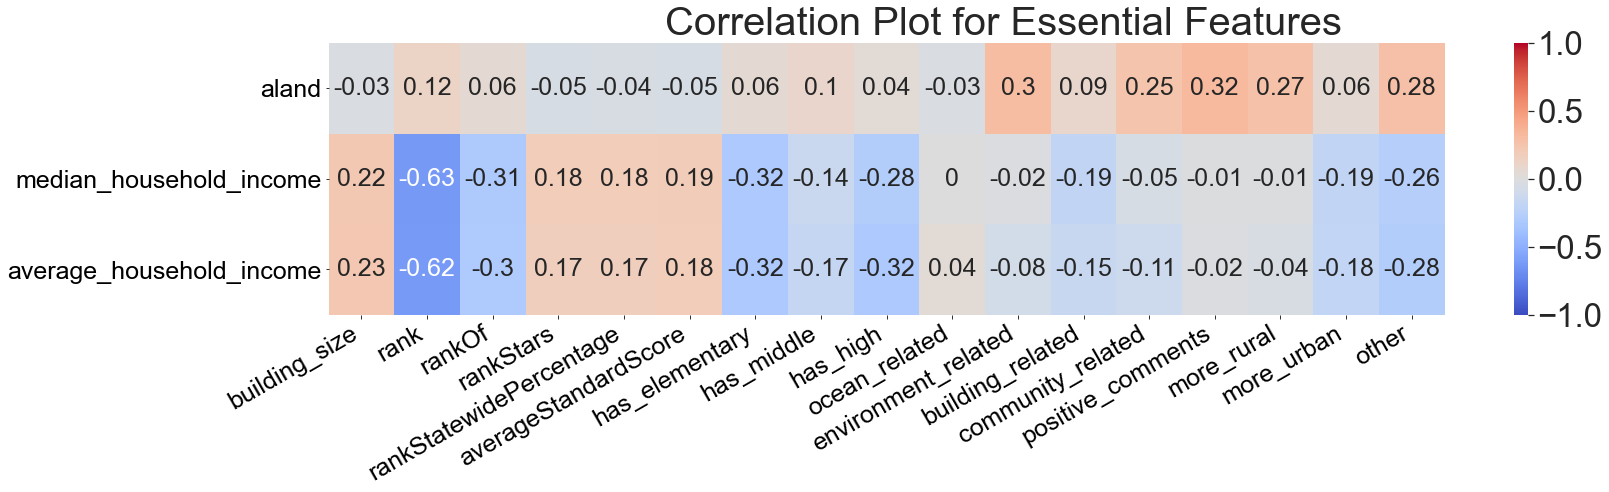

In [4]:
fig, ax = plt.subplots(figsize=(25,5))
sns.set(font_scale=3)
sns.heatmap(dc[4:7], annot = True, 
            cmap=plt.get_cmap('coolwarm'), vmin = -1, vmax = 1, annot_kws={"fontsize":25}).figure.axes[-1].yaxis.label.set_size(450)
fig.suptitle('Correlation Plot for Essential Features', fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation="30", horizontalalignment='right', fontsize = 25)

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)
log_y = np.log(y)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
def inv_normalize_price(feature_normalized):
    mu = log_y.mean()
    sd = log_y.std()
    return sd*feature_normalized + mu

In [9]:
print("Linear Regression\n")
regr = LinearRegression()
kfold = KFold(n_splits=5)
y_pred = cross_val_predict(regr, X, log_y, cv=kfold)
test_error = sqrt(mean_squared_error(y, np.exp(y_pred)))
print(test_error)
# scores = cross_validate(regr, X, y, cv=kfold,
#                         scoring=('r2', 'neg_root_mean_squared_error'),
#                         return_train_score=True)
# print('train rmse is: ' + str(-1*mean(scores['train_neg_root_mean_squared_error'])))
# print('test rmse is: ' + str(-1*mean(scores['test_neg_root_mean_squared_error'])))
# print('R-square is: ' + str(mean(scores['test_r2'])))
#regr.fit(X_train, log_y_train)
#print(regr.score(X_test, log_y_test))

Linear Regression

48.92467256746259


In [10]:
#train_error = sqrt(mean_squared_error(y_train, np.exp(regr.predict(X_train))))
#print(train_error)

In [11]:
#test_error = sqrt(mean_squared_error(y_test, np.exp(regr.predict(X_test))))
#print(test_error)

In [12]:
# plt.figure(figsize=(15,10))
# plt.scatter(y_test, y_test-np.exp(regr.predict(X_test)))
# plt.title('Residuals VS Fitted Values', fontsize = 25)
# plt.xlabel('Fitted Values(Price in $)', fontsize = 20)
# plt.ylabel('Residuals', fontsize = 20)
# plt.ticklabel_format(useOffset=False, style='plain')
# plt.show()

In [13]:
# lr_cv = LinearRegression()
# kfold = KFold(n_splits=5, shuffle = True)
# lr_cv_scores = cross_val_score(lr_cv, X, y, cv=kfold)
# print(lr_cv_scores)
# print('cv_scores mean {}'.format(np.mean(lr_cv_scores)))

In [14]:
print("KNN\n")
neighbors = np.arange(1, 11)
train_rmse = np.empty(len(neighbors))
test_rmse = np.empty(len(neighbors))
r_square_list = np.empty(len(neighbors))
best_k = 0
best_difference = inf
  
# with tf.device('/device:GPU:0'):
for i, k in enumerate(neighbors):
  knn = KNeighborsRegressor(n_neighbors=k)
  kfold = KFold(n_splits=5, shuffle = True)
  scores = cross_validate(knn, X, y, cv=kfold,
                          scoring=('r2', 'neg_root_mean_squared_error'),
                          return_train_score=True)
  print(k)
  print('train rmse is: ' + str(-1*mean(scores['train_neg_root_mean_squared_error'])))
  train_rmse[i] = -1*mean(scores['train_neg_root_mean_squared_error'])
  print('test rmse is: ' + str(-1*mean(scores['test_neg_root_mean_squared_error'])))
  test_rmse[i] = -1*mean(scores['test_neg_root_mean_squared_error'])
  print('R-square is: ' + str(mean(scores['test_r2'])))
  r_square_list[i] = mean(scores['test_r2'])

KNN

1
train rmse is: -0.0
test rmse is: 1259.452054621266
R-square is: 0.42283604430406596
2
train rmse is: 620.9431117319662
test rmse is: 1293.5433004698407
R-square is: 0.40599268375131153
3
train rmse is: 850.3792875273857
test rmse is: 1285.0626156926808
R-square is: 0.4178361078131551
4
train rmse is: 979.8665515836105
test rmse is: 1365.425454941912
R-square is: 0.3364589506326451
5
train rmse is: 1077.5255322359878
test rmse is: 1337.109399616807
R-square is: 0.3663465017356193
6
train rmse is: 1131.2494624311846
test rmse is: 1418.3784173235604
R-square is: 0.281279290972637
7
train rmse is: 1186.675997602334
test rmse is: 1407.6308298739564
R-square is: 0.29638684140259186
8
train rmse is: 1227.5914469372583
test rmse is: 1427.3092054900696
R-square is: 0.2756850590635396
9
train rmse is: 1264.4021394530787
test rmse is: 1430.9779217537491
R-square is: 0.2560115817464173
10
train rmse is: 1284.8657260051702
test rmse is: 1448.6529832791061
R-square is: 0.2554378529254722


In [15]:
knn_cv = KNeighborsRegressor(n_neighbors=3)
kfold = KFold(n_splits=5, shuffle = True)
cv_scores = cross_val_score(knn_cv, X, y, cv=kfold)
print(cv_scores)
print('cv_scores mean{}'.format(np.mean(cv_scores)))

[0.39686433 0.495442   0.39532333 0.48971645 0.40021534]
cv_scores mean0.43551229014886966


In [16]:
# X = df.iloc[:,lambda df: [4, 7]].values
# y = df.iloc[:, 0].values
# print(X)

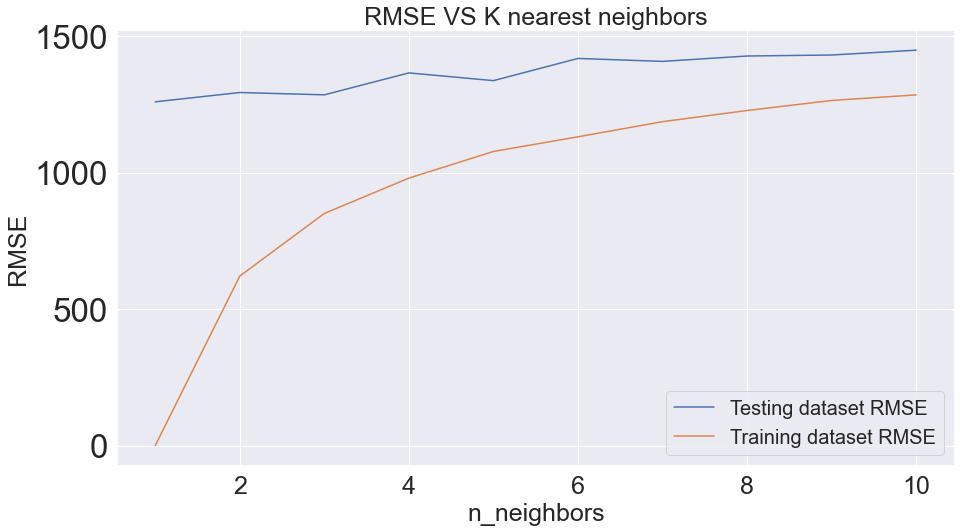

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(neighbors, test_rmse, label = 'Testing dataset RMSE')
plt.plot(neighbors, train_rmse, label = 'Training dataset RMSE')
plt.title('RMSE VS K nearest neighbors', fontsize = 25)
  
plt.legend(fontsize = 20)
plt.xlabel('n_neighbors', fontsize = 25)
plt.ylabel('RMSE', fontsize = 25)
plt.xticks(fontsize = 25)
#ax.set_yticklabels(['-1', '0', '100,000', '200,000', '300,000'], fontsize = 25)
##plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

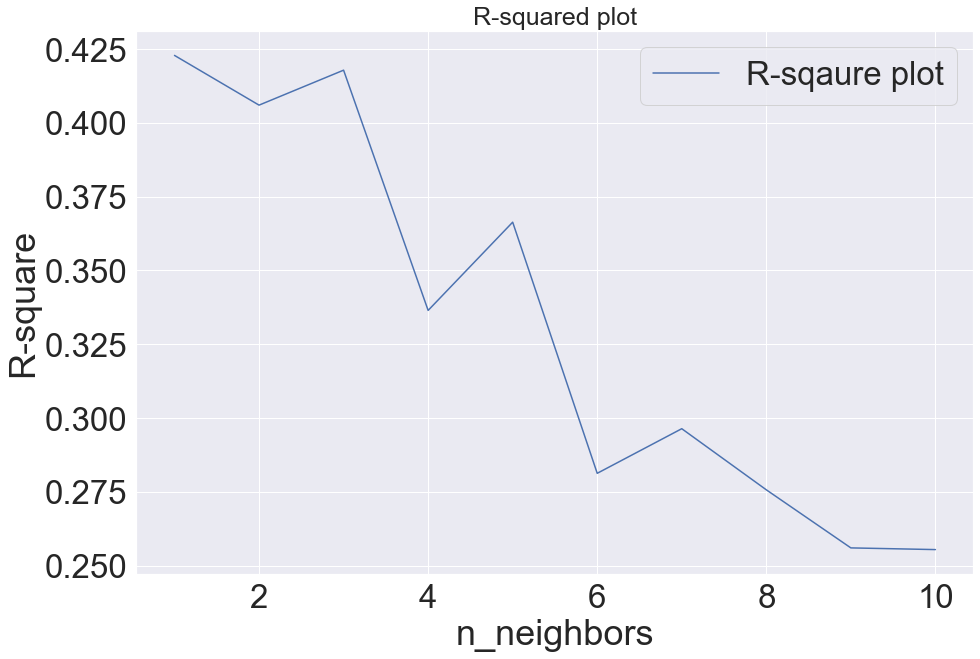

In [18]:
plt.figure(figsize=(15,10))
plt.plot(neighbors, r_square_list, label = 'R-sqaure plot')
plt.title('R-squared plot', fontsize = 25)
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('R-square')
plt.show()

In [19]:
rf = RandomForestRegressor(n_estimators = 50, bootstrap=True, max_depth=80, min_samples_leaf=2, min_samples_split=5)
rf.fit(X_train, y_train)



RandomForestRegressor(max_depth=80, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)

<ipython-input-20-52bcea493638>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([ '-1', '0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'], fontsize = 25)


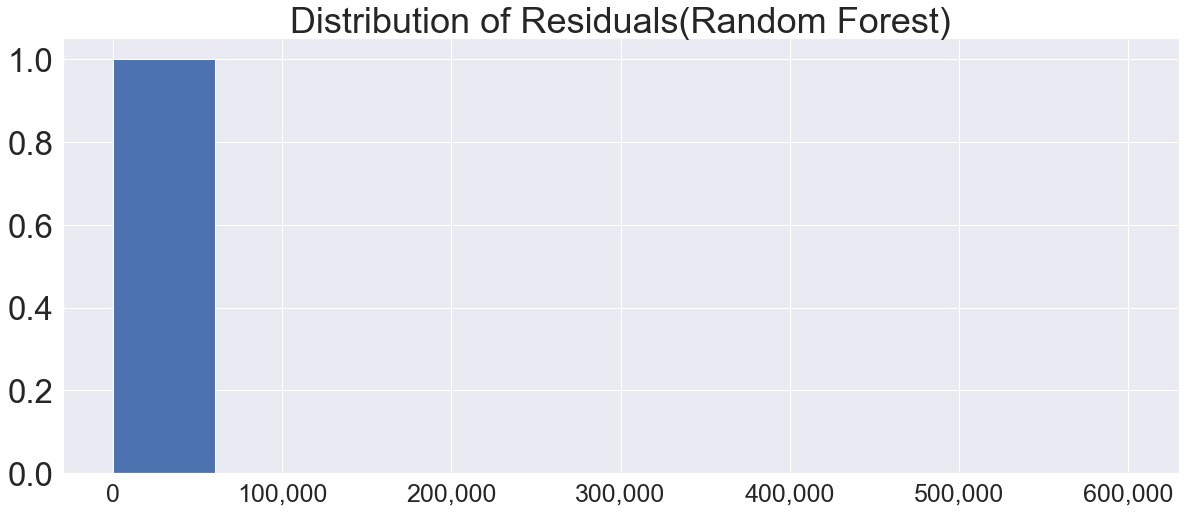

In [20]:
for_his = np.absolute(y_test - rf.predict(X_test))
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Distribution of Residuals(Random Forest)')
plt.hist(for_his, range = [0, 600000], weights=np.ones(len(for_his)) / len(for_his))
ax.set_xticklabels([ '-1', '0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000'], fontsize = 25)
plt.show()

In [21]:
print("Random Forest\n")
rf_n = [1, 10, 20, 50, 100]
rf_train_rmse = []
rf_test_rmse = []
best_n = 0
best_test_rmse = inf

# with tf.device('/device:GPU:0'):
for n in rf_n:
    rf = RandomForestRegressor(n_estimators = n)
    kfold = KFold(n_splits=5, shuffle = True)
    scores = cross_validate(rf, X, y, cv=kfold,
                          scoring=('r2', 'neg_root_mean_squared_error'),
                          return_train_score=True)
    print(n)
    print('train rmse is: ' + str(-1*mean(scores['train_neg_root_mean_squared_error'])))
    rf_train_rmse.append(-1*mean(scores['train_neg_root_mean_squared_error']))
    print('test rmse is: ' + str(-1*mean(scores['test_neg_root_mean_squared_error'])))
    rf_test_rmse.append(-1*mean(scores['test_neg_root_mean_squared_error']))
    print('R-square is: ' + str(mean(scores['test_r2'])))
    if(-1*mean(scores['test_neg_root_mean_squared_error']) < best_test_rmse):
        best_test_rmse = -1*mean(scores['test_neg_root_mean_squared_error'])
        best_n = n





Random Forest

1
train rmse is: 19.230080520834505
test rmse is: 37.06439575066792
R-square is: 0.9995006901987343
10
train rmse is: 9.234677112964745
test rmse is: 18.46415176974527
R-square is: 0.9998734974356738
20
train rmse is: 7.537144416248902
test rmse is: 16.153574730003495
R-square is: 0.9999072353842778
50
train rmse is: 6.7844022005241795
test rmse is: 14.654770368674821
R-square is: 0.9999207570236703
100
train rmse is: 5.705247377564908
test rmse is: 16.530615153689933
R-square is: 0.9998954844092168


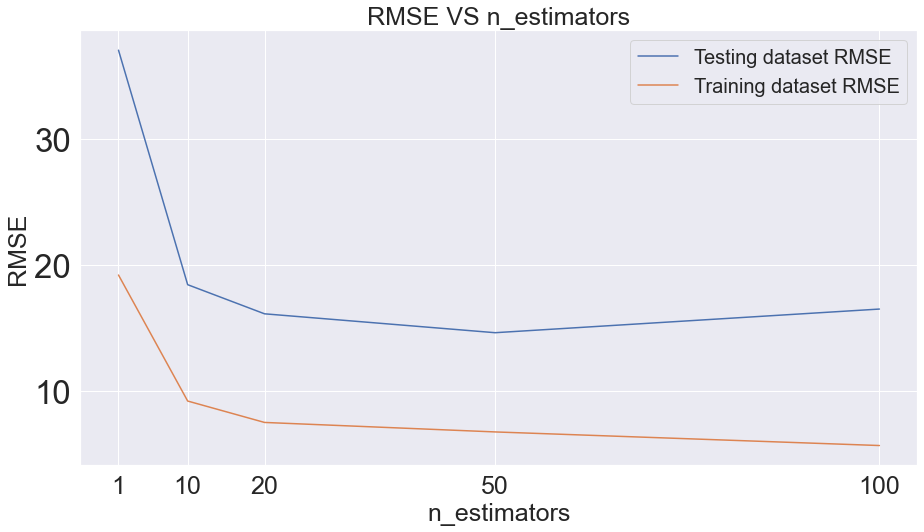

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(rf_n, rf_test_rmse, label = 'Testing dataset RMSE')
plt.plot(rf_n, rf_train_rmse, label = 'Training dataset RMSE')
plt.title('RMSE VS n_estimators', fontsize = 25)
  
plt.legend(fontsize = 20)
plt.xlabel('n_estimators', fontsize = 25)
plt.ylabel('RMSE', fontsize = 25)
#plt.ylim(0, 400000)
plt.xticks([1, 10, 20, 50, 100], fontsize = 25)
##plt.yticks([200000, 400000, 600000, 800000, 1000000, 1200000], fontsize = 18)
#ax.set_yticklabels([ '0', '100,000', '150,000', '200,000', '250,000', '300,000'], fontsize = 25)
##plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [23]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor(n_estimators=50)
rf_best = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_best.fit(X_train, y_train)
print("Score is: " + str(rf_best.score(X_test, y_test)))
train_error = sqrt(mean_squared_error(y_train, rf_best.predict(X_train)))
##rf_train_rmse.append(train_error)
print("Training error is: " + str(train_error))
test_error = sqrt(mean_squared_error(y_test, rf_best.predict(X_test)))
##rf_test_rmse.append(test_error)
print("Testing error for is: " + str(test_error))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score is: 0.9999449300249938
Training error is: 6.774226837164796
Testing error for is: 12.16741298854202


In [24]:
rf_best.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 80,
 'bootstrap': True}

In [25]:
rf = RandomForestRegressor(n_estimators = 50, bootstrap=rf_best.best_params_['bootstrap'], max_depth=rf_best.best_params_['max_depth'], min_samples_leaf=rf_best.best_params_['min_samples_leaf'], min_samples_split=rf_best.best_params_['min_samples_split'])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)



In [26]:
pd.DataFrame({'Variable':df.iloc[:, 1:].columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
23,postal_code,9.991500e-01
2,population_rank,1.868509e-04
1,population,1.705980e-04
20,median_value_of_owner_occupied_units,9.392046e-05
22,property_crime_rate,8.082065e-05
21,violent_crime_rate,7.289957e-05
4,median_household_income,1.994220e-05
46,community_related,1.953824e-05
50,other,1.489170e-05
8,householder_under_25_years,1.482012e-05


In [27]:
# rf = RandomForestRegressor(n_estimators = 50)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)



In [28]:
# plt.figure(figsize=(15,10))
# plt.scatter(y_pred, y_test-y_pred)
# plt.title('Residuals VS Fitted Values', fontsize = 25)
# plt.xlabel('Fitted Values(Price in $)', fontsize = 20)
# plt.ylabel('Residuals', fontsize = 20)
# plt.xlim(0, 10000000)
# plt.ylim(-5000000, 5000000)
# plt.ticklabel_format(useOffset=False, style='plain')
# plt.show()

In [29]:
# rf_cv = RandomForestRegressor(n_estimators = 20)
# kfold = KFold(n_splits=5, shuffle = True)
# rf_cv_scores = cross_val_score(rf_cv, X, y, cv=kfold)
# print(rf_cv_scores)
# print('cv_scores mean{}'.format(np.mean(rf_cv_scores)))

In [30]:
print('\n')
print('ANN')
test_errors=[]
# with tf.device('/device:GPU:0'):
for layers in [50,60,70]:
    NNregr=MLPRegressor(hidden_layer_sizes=(layers, 7), max_iter=1000)
    NNregr.n_layers_=7
    NNregr.fit(X_train, y_train)
    train_error = sqrt(mean_squared_error(y_train, NNregr.predict(X_train)))
    print('\n')
    print("Hidden layers for " + str(layers) + " is: " + str(NNregr.n_layers_))
    print("Training error for " + str(layers) + " is: " + str(train_error))
    test_error = sqrt(mean_squared_error(y_test, NNregr.predict(X_test)))
    test_errors.append(test_error)
    print("Testing error for " + str(layers) + " is: " + str(test_error))
    score = NNregr.score(X_test, y_test)
    print("Score for " + str(layers) + " is: " + str(score))



ANN


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(




Hidden layers for 50 is: 4
Training error for 50 is: 26408.261016692057
Testing error for 50 is: 26607.21960089657
Score for 50 is: -262.34032612626726


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(




Hidden layers for 60 is: 4
Training error for 60 is: 30855.601439060407
Testing error for 60 is: 30768.10364426483
Score for 60 is: -351.1436331604306


Hidden layers for 70 is: 4
Training error for 70 is: 26995.978159249706
Testing error for 70 is: 26880.95106715005
Score for 70 is: -267.78661721816405


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
test_errors

[26607.21960089657, 30768.10364426483, 26880.95106715005]